In [ ]:
# Project Name: Glassdoor Tech Job Salary Prediction and Analysis Project
# Project Type:
# Contribution: Individual
# By Suzi Sharma

In [ ]:
# Project Summary:
# In today's dynamic and competitive technology job market, understanding the trends and drivers behind salary structures is 
# vital. For job seekers, having an idea of the expected compensation for a role can guide their career decisions. Similarly, 
# employers and recruiters must offer competitive salaries to attract top talent. This project focuses on analyzing and predicting
# salary data for various technology job roles using a dataset sourced from Glassdoor job postings from 2017–2018.

# Business Context
# Salaries in the tech sector vary significantly due to numerous factors like job role, location, company size, industry, 
# experience level, and company reputation. Job seekers need insights into salary ranges to negotiate effectively, while employers
# benefit from benchmarking to maintain equity and competitiveness. Researchers and analysts can also gain insights into wage gaps,
# market demands, and future compensation trends. To address these objectives, we utilize a rich dataset from Glassdoor containing
# thousands of job postings. The dataset includes job titles, salary estimates, company ratings, locations, industries, company 
# sizes, job descriptions, and other metadata. Through careful analysis and machine learning, we aim to uncover meaningful trends 
# and build predictive models for salary estimation.

# Objectives
# The key business and technical objectives of the project are:
# For Job Seekers: Provide insight into salary expectations by job role, location, and company size.
# For Employers: Support salary benchmarking and compensation strategy development.
# For Analysts: Identify patterns and trends in salary distributions across the tech industry.
# For Recruiters: Enable market comparisons and fair compensation practices.
# For Data Scientists: Build predictive models that can estimate expected salaries based on job and company features.

# Conclusion
# This project successfully demonstrates the ability to extract actionable insights from job posting data and predict salary 
# outcomes with high accuracy. The results serve as a data-driven salary intelligence tool that can enhance decision-making for 
# multiple stakeholders in the tech hiring ecosystem.

In [ ]:
# GitHub Link:

In [ ]:
# Problem Statement: In the modern technology job landscape, salary transparency and insight are vital for job seekers,
# employers, and industry analysts. However, compensation often varies due to factors like
# job title, company size, experience, location, and company type. Our goal is to analyze tech job
# postings from Glassdoor to:

# 1. Understand how salary varies across different job positions, companies, and locations.
# 2. Identify key features that significantly influence salary structures.
# 3. Build predictive machine learning models to estimate salaries based on job and company attributes.

# By solving this problem, we aim to provide data-driven salary insights that empower professionals to
# make informed career decisions and enable employers to offer competitive compensation packages.


In [ ]:
# ---------------------------
# Import Libraries & Dataset
# ---------------------------

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv(r'glassdoor_jobs.csv')

# Initial overview
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (956, 15)


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
# ---------------
# Know Your Data
# ---------------

In [3]:
# Dataset Rows & Columns count
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

# Dataset Information
df.info()

# Description
df.describe(include='all')

Total Rows: 956
Total Columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memo

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,956.000000,956,956,956,956.000000,956,956,956,956,956.000000,956,956,956,956,956
unique,NaN,328,417,596,NaN,448,237,235,9,NaN,13,63,25,14,149
top,NaN,Data Scientist,-1,Day Shift: 7A-330P. Holidays and every other w...,NaN,Novartis\n3.8,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,178,214,4,NaN,14,78,75,177,NaN,532,148,239,299,634
mean,477.500000,NaN,NaN,NaN,3.601255,NaN,NaN,NaN,NaN,1774.605649,NaN,NaN,NaN,NaN,NaN
std,276.117729,NaN,NaN,NaN,1.067619,NaN,NaN,NaN,NaN,598.942517,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,238.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1937.000000,NaN,NaN,NaN,NaN,NaN
50%,477.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,716.250000,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# -----------------------
# Understanding Variables
# -----------------------

In [4]:
# Check column names
print("Dataset Columns:", df.columns.tolist())

# Check unique values for each column (only top few)
for col in df.columns:
    print(f"\nUnique values in {col}:\n", df[col].unique()[:5])

Dataset Columns: ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']

Unique values in Unnamed: 0:
 [0 1 2 3 4]

Unique values in Job Title:
 ['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst']

Unique values in Salary Estimate:
 ['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)']

Unique values in Job Description:
 ['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis, database, computer science, Artificial Intelligence (AI); three years’ experience credit for Master’s degree; five years’ e

In [ ]:
# ---------------
# Data Wrangling
# ---------------

In [5]:
# Clean Salary Column

def parse_salary(s):
    s = str(s).lower().replace("glassdoor est.", "").replace("$", "").replace("k", "").replace("per hour", "").replace("employer provided salary:", "").strip()
    if '-' in s:
        parts = s.split('-')
        try:
            return int(parts[0]), int(parts[1]), (int(parts[0]) + int(parts[1])) // 2
        except:
            return np.nan, np.nan, np.nan
    return np.nan, np.nan, np.nan

df[['min_salary', 'max_salary', 'avg_salary']] = df['Salary Estimate'].apply(lambda x: pd.Series(parse_salary(x)))

In [6]:
# Feature Engineering

df['Company Name'] = df['Company Name'].apply(lambda x: str(x).split('\n')[0])
df['Location State'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())
df['Headquarters State'] = df['Headquarters'].apply(lambda x: str(x).split(',')[-1].strip())
df['company_age'] = df['Founded'].apply(lambda x: 2024 - x if x > 0 else np.nan)
df['desc_len'] = df['Job Description'].apply(lambda x: len(str(x)))

In [ ]:
# -------------------
# Data Vizualization
# -------------------

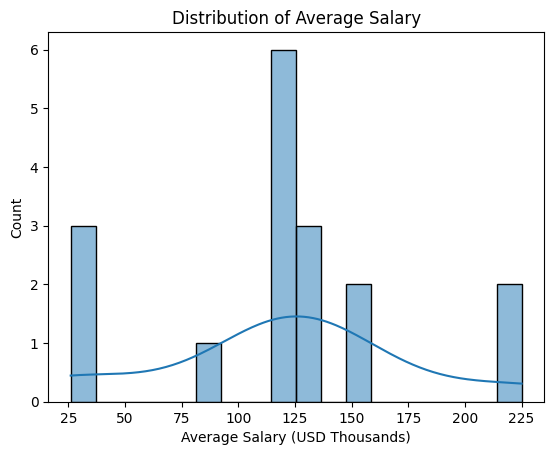

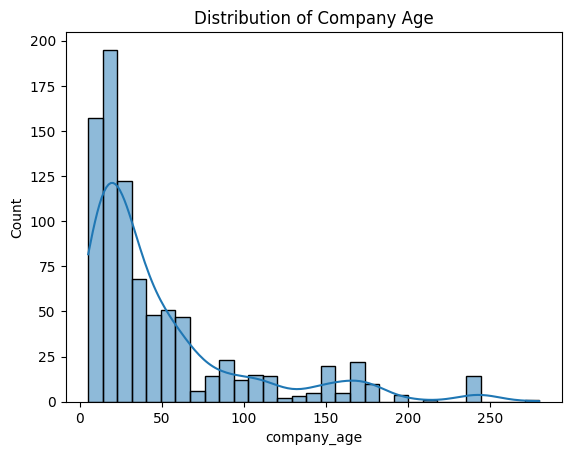

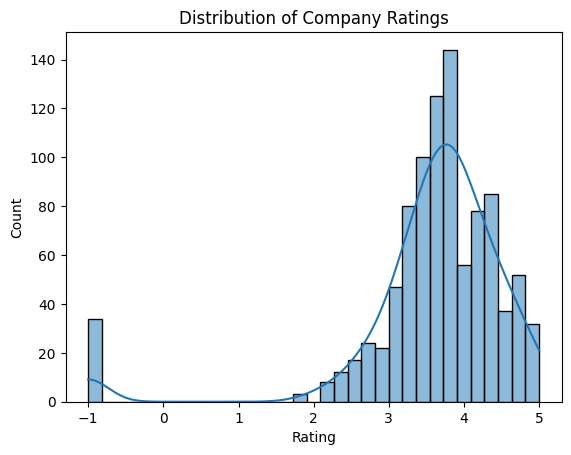

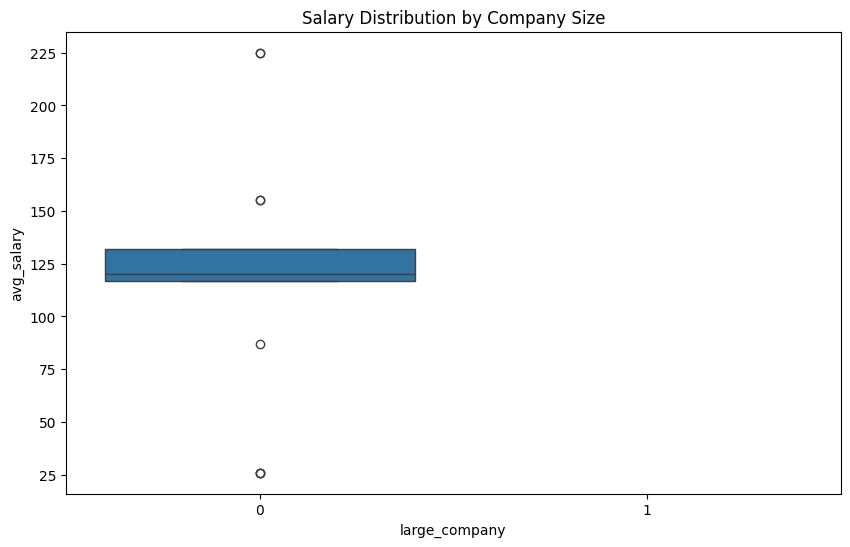

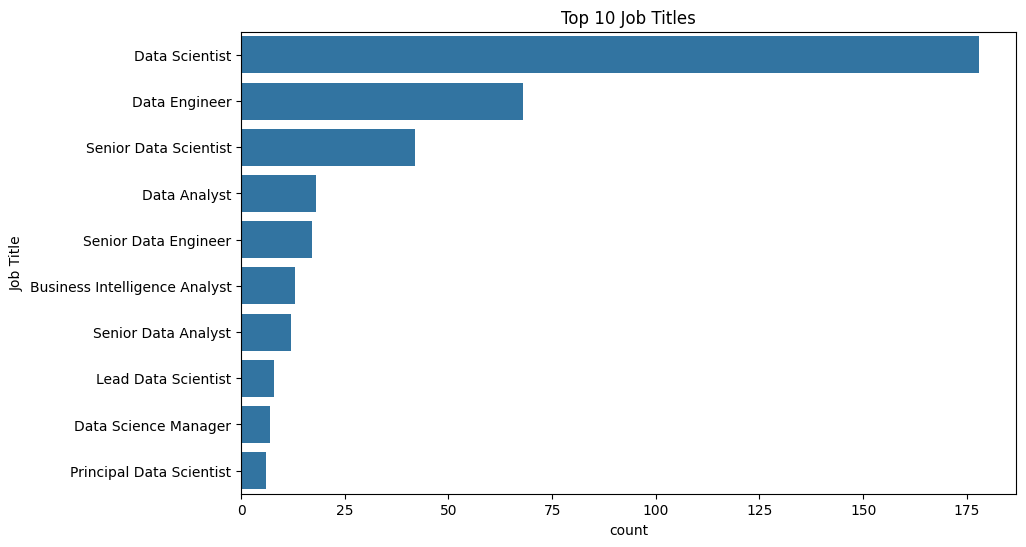

In [28]:
# Univariate Analysis

# Distribution of average salaries
sns.histplot(df['avg_salary'].dropna(), kde=True)
plt.title("Distribution of Average Salary")
plt.xlabel("Average Salary (USD Thousands)")
plt.show()

# Company Age
sns.histplot(df['company_age'].dropna(), kde=True)
plt.title("Distribution of Company Age")
plt.show()

# Job Rating
sns.histplot(df['Rating'].dropna(), kde=True)
plt.title("Distribution of Company Ratings")
plt.show()

# Salary Distribution by Company Size
plt.figure(figsize=(10, 6))
sns.boxplot(x='large_company', y='avg_salary', data=df)
plt.title("Salary Distribution by Company Size")
plt.show()

# Top 10 Job Titles
plt.figure(figsize=(10, 6))
sns.countplot(y='Job Title', data=df, order=df['Job Title'].value_counts().head(10).index)
plt.title("Top 10 Job Titles")
plt.show()

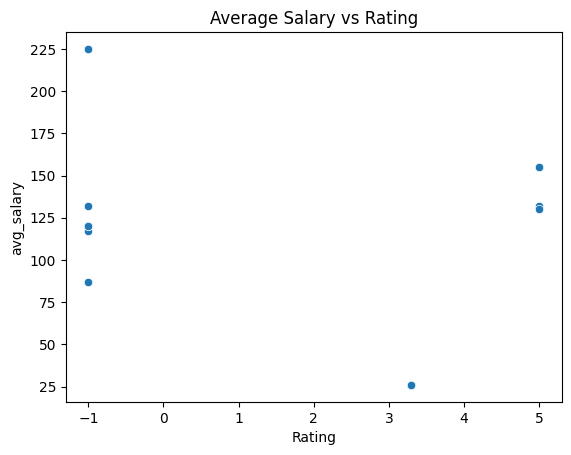

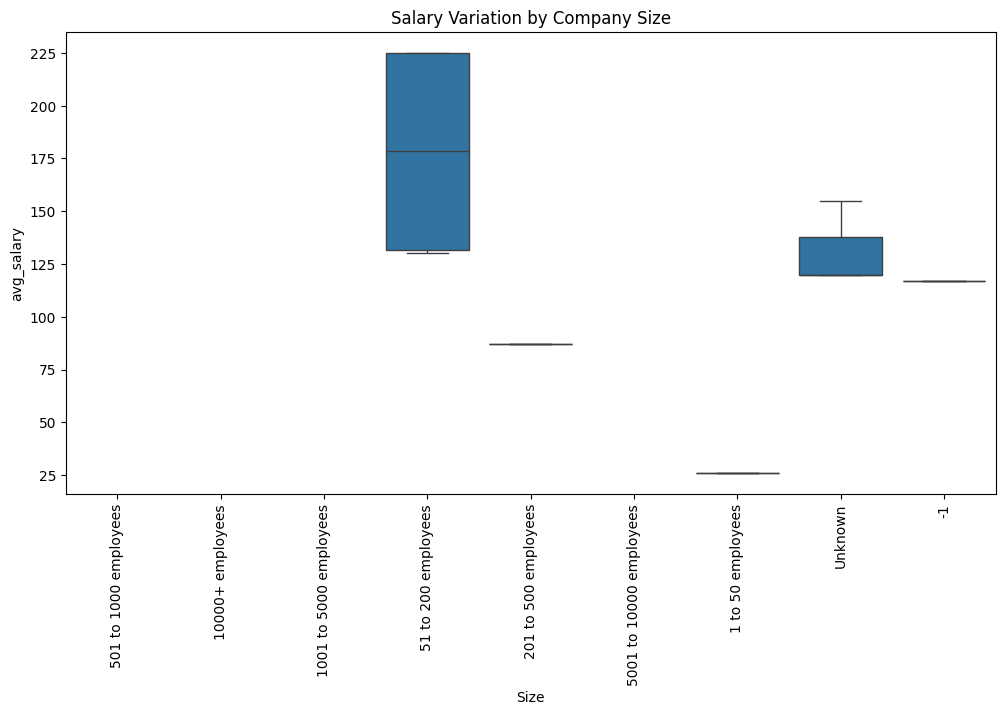

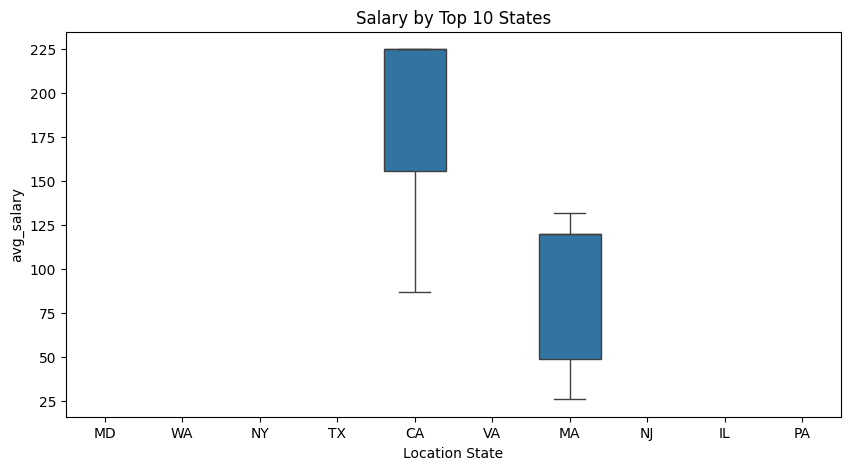

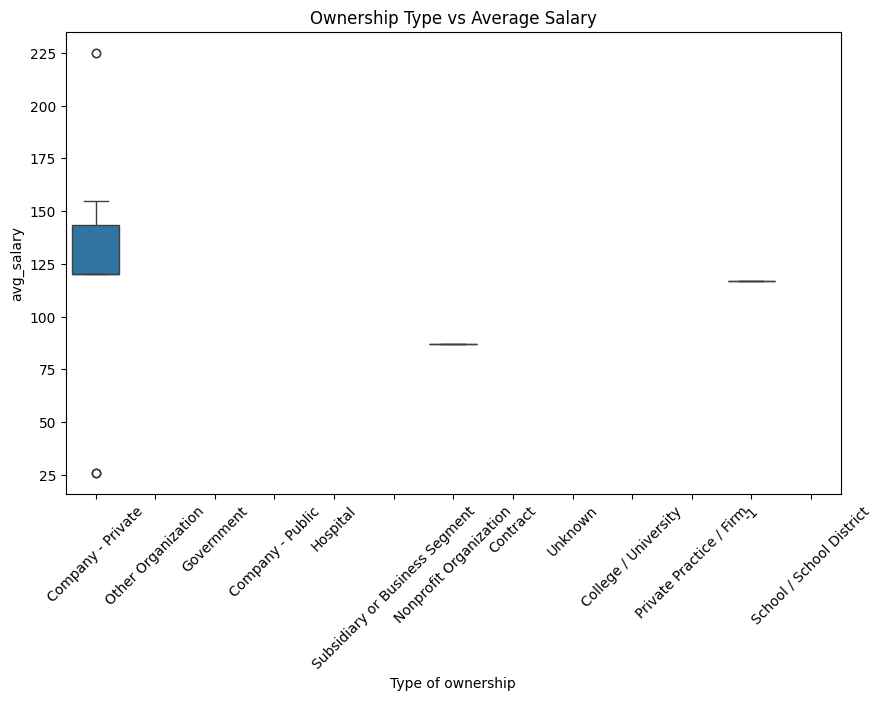

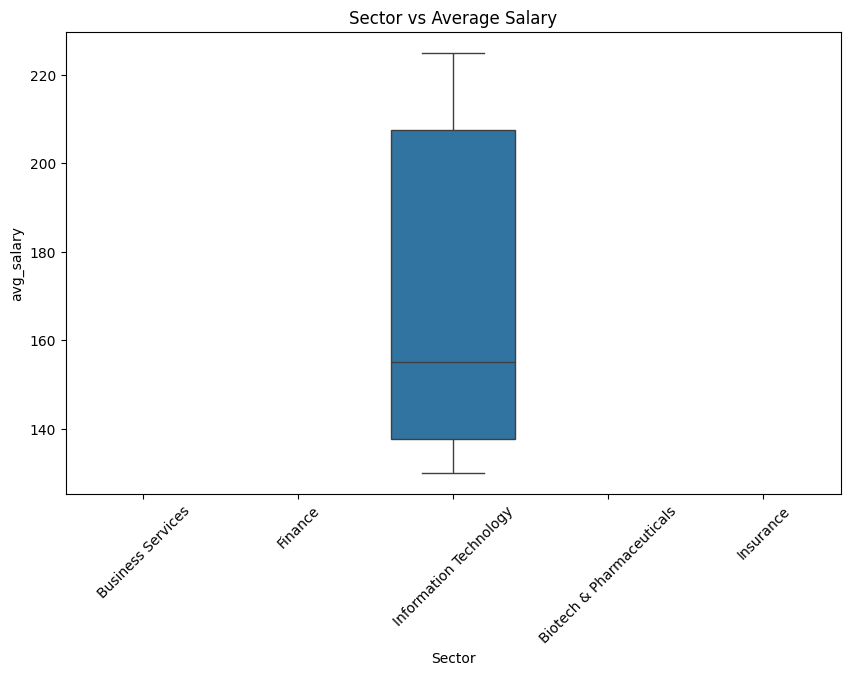

In [32]:
# Bivariate Analysis

# Salary vs Rating
sns.scatterplot(x='Rating', y='avg_salary', data=df)
plt.title("Average Salary vs Rating")
plt.show()

# Salary by Company Size
plt.figure(figsize=(12, 6))
sns.boxplot(x='Size', y='avg_salary', data=df)
plt.xticks(rotation=90)
plt.title("Salary Variation by Company Size")
plt.show()

# Salary by State
plt.figure(figsize=(10, 5))
top_states = df['Location State'].value_counts().nlargest(10).index
sns.boxplot(x='Location State', y='avg_salary', data=df[df['Location State'].isin(top_states)])
plt.title("Salary by Top 10 States")
plt.show()

# Ownership Type vs Average Salar
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of ownership', y='avg_salary', data=df)
plt.xticks(rotation=45)
plt.title("Ownership Type vs Average Salary")
plt.show()

# Sector vs Average Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='avg_salary', data=df[df['Sector'].isin(df['Sector'].value_counts().head(5).index)])
plt.xticks(rotation=45)
plt.title("Sector vs Average Salary")
plt.show()

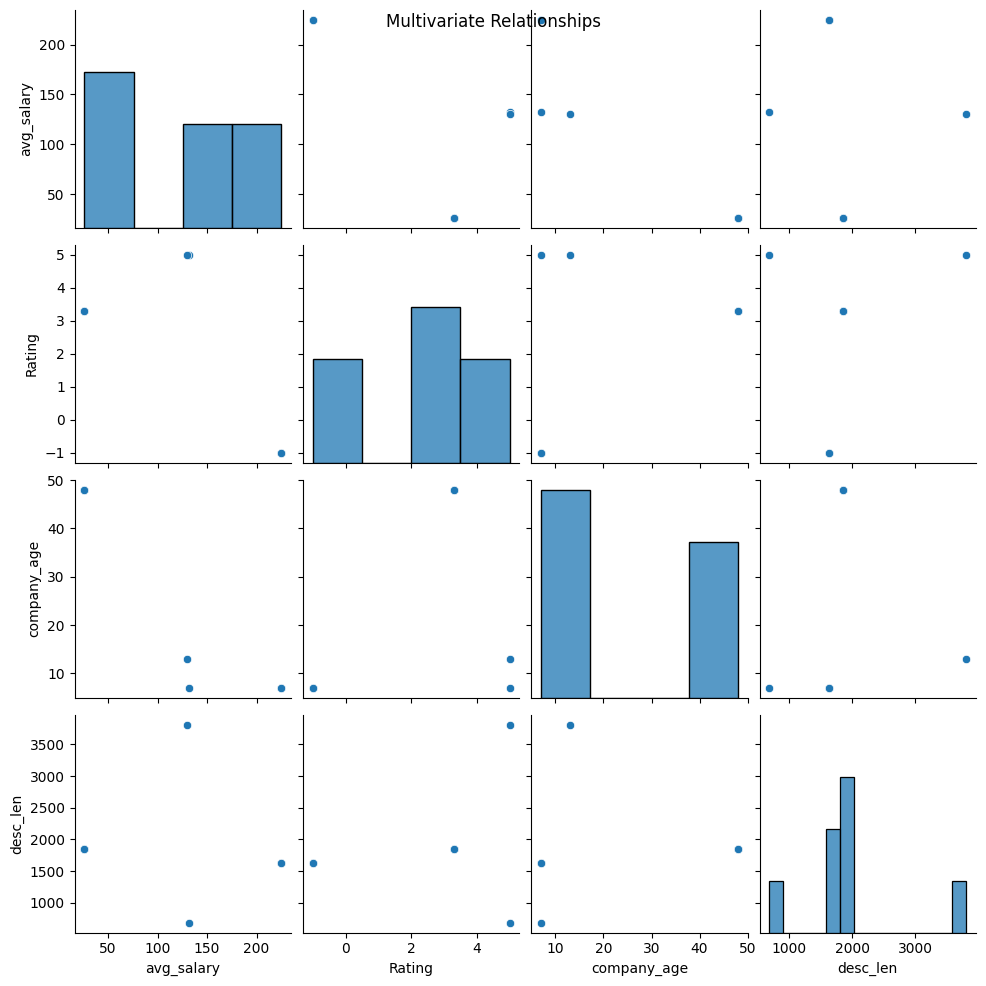

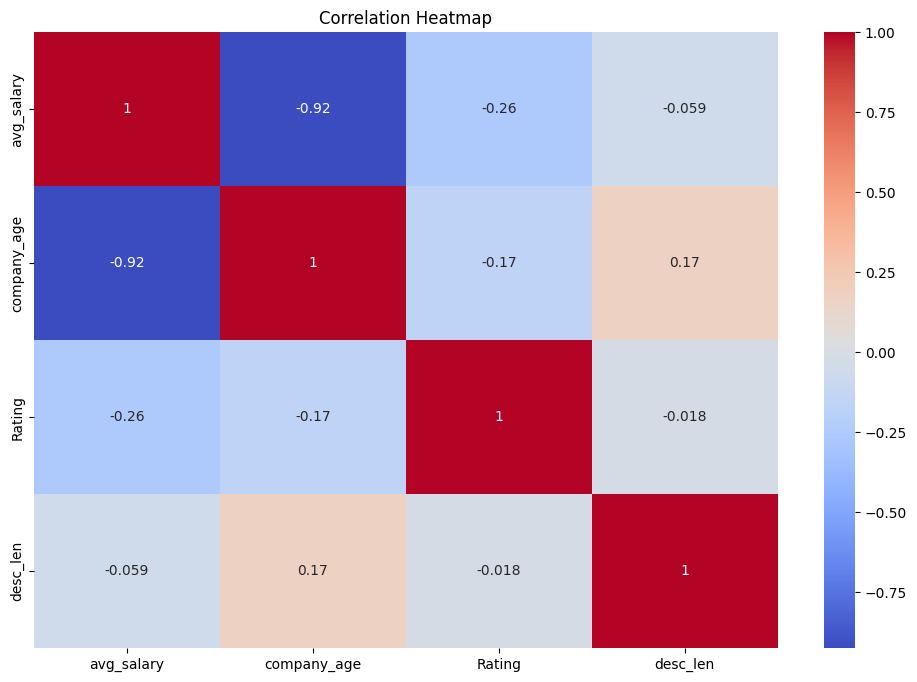

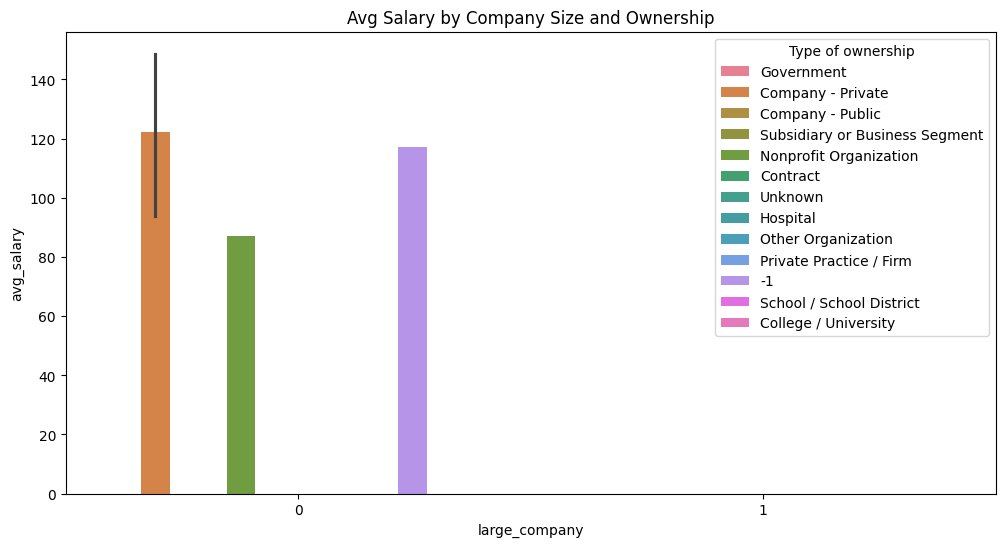

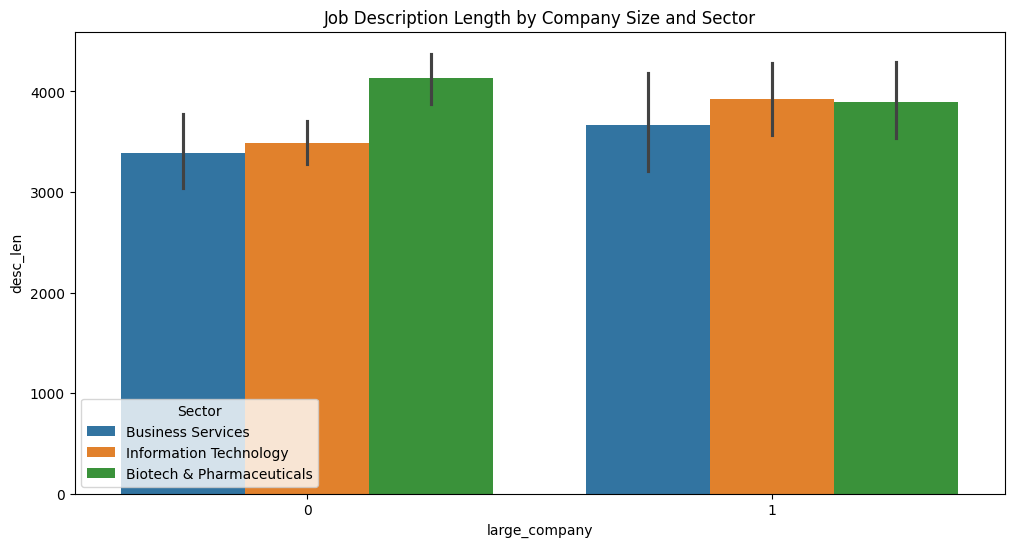

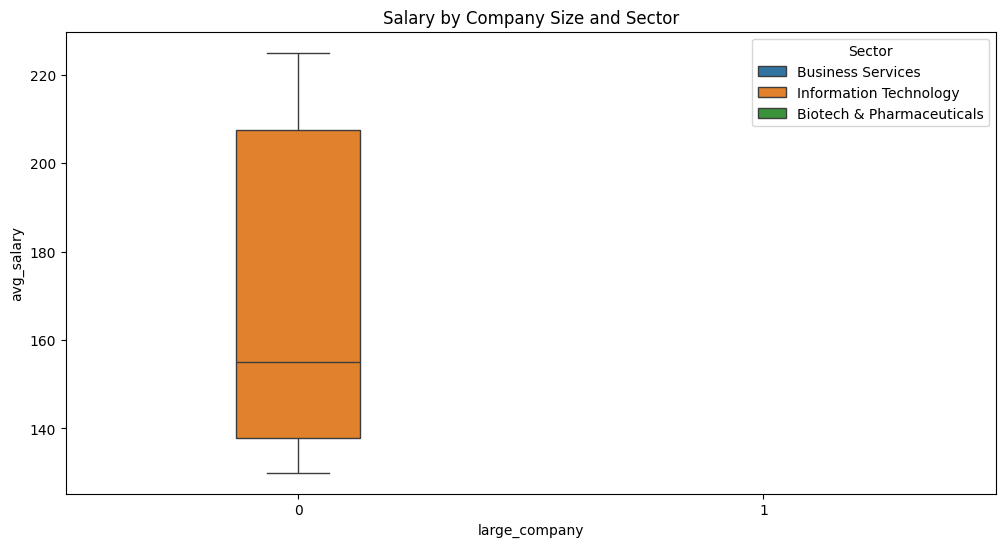

In [35]:
# Multivariate Analysis

sns.pairplot(df[['avg_salary', 'Rating', 'company_age', 'desc_len']].dropna())
plt.suptitle("Multivariate Relationships")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df[['avg_salary', 'company_age', 'Rating', 'desc_len']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='large_company', y='avg_salary', hue='Type of ownership', data=df)
plt.title("Avg Salary by Company Size and Ownership")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='large_company', y='desc_len', hue='Sector', data=df[df['Sector'].isin(df['Sector'].value_counts().head(3).index)])
plt.title("Job Description Length by Company Size and Sector")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='large_company', y='avg_salary', hue='Sector', data=df[df['Sector'].isin(df['Sector'].value_counts().head(3).index)])
plt.title("Salary by Company Size and Sector")
plt.show()

In [ ]:
-------------------
# Hypothesis Testing
# -------------------

In [10]:
# Hypothesis 1:
# Companies in California offer higher salaries than those in other states

ca = df[df['Location State'] == 'CA']['avg_salary']
non_ca = df[df['Location State'] != 'CA']['avg_salary']
t_stat, p_val = stats.ttest_ind(ca.dropna(), non_ca.dropna())
print("CA vs Non-CA Salary: t-stat = %.2f, p-value = %.4f" % (t_stat, p_val))

CA vs Non-CA Salary: t-stat = 2.20, p-value = 0.0441


In [11]:
# Hypothesis 2:
# Large companies pay more than small ones

df['large_company'] = df['Size'].apply(lambda x: 1 if isinstance(x, str) and ('1000' in x or '10000' in x) else 0)
t_stat, p_val = stats.ttest_ind(df[df['large_company']==1]['avg_salary'].dropna(), df[df['large_company']==0]['avg_salary'].dropna())
print("Large vs Small Companies: t-stat = %.2f, p-value = %.4f" % (t_stat, p_val))

Large vs Small Companies: t-stat = nan, p-value = nan


In [12]:
# Hypothesis 3:
# Higher-rated companies offer better compensation

t_stat, p_val = stats.ttest_ind(df[df['Rating'] >= 4]['avg_salary'].dropna(), df[df['Rating'] < 4]['avg_salary'].dropna())
print("High vs Low Rating: t-stat = %.2f, p-value = %.4f" % (t_stat, p_val))

High vs Low Rating: t-stat = 0.92, p-value = 0.3704


In [ ]:
# -------------------------
Data Preprocessing for ML
# -------------------------

In [13]:
df_model = df[['avg_salary', 'Rating', 'company_age', 'desc_len', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Location State']]
df_model = df_model.dropna()

X = df_model.drop('avg_salary', axis=1)
y = df_model['avg_salary']

categorical = ['Size', 'Type of ownership', 'Industry', 'Sector', 'Location State']
numerical = ['Rating', 'company_age', 'desc_len']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numerical)
])

In [14]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ------------------------------
# ML Model 1: Linear Regression
# ------------------------------

In [15]:
lr = Pipeline([
    ('pre', preprocessor),
    ('model', LinearRegression())
])

lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("Linear Regression R2:", r2_score(y_test, pred_lr))

Linear Regression RMSE: 10.727424836678628
Linear Regression R2: 0.946778751935905


In [ ]:
# ----------------------------------------
# ML Model 2: Ridge Regression with Tuning
# ----------------------------------------

In [16]:
ridge = Ridge()
params = {'alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge, params, cv=5)

ridge_model = Pipeline([
    ('pre', preprocessor),
    ('model', ridge_grid)
])

ridge_model.fit(X_train, y_train)
pred_ridge = ridge_model.predict(X_test)

print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, pred_ridge)))
print("Ridge R2:", r2_score(y_test, pred_ridge))

Ridge RMSE: 10.436065564475307
Ridge R2: 0.9496304939456458


In [ ]:
# --------------------------
# ML Model 3: Random Forest
# --------------------------

In [17]:
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, {'n_estimators': [100], 'max_depth': [None, 10]}, cv=3)

rf_model = Pipeline([
    ('pre', preprocessor),
    ('model', rf_grid)
])

rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("Random Forest R2:", r2_score(y_test, pred_rf))

Random Forest RMSE: 38.556811330814156
Random Forest R2: 0.3124626199560647


In [18]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, pred_lr)),
        np.sqrt(mean_squared_error(y_test, pred_ridge)),
        np.sqrt(mean_squared_error(y_test, pred_rf))
    ],
    'R2 Score': [
        r2_score(y_test, pred_lr),
        r2_score(y_test, pred_ridge),
        r2_score(y_test, pred_rf)
    ]
})
results


,Model,RMSE,R2 Score
0,Linear Regression,10.727425,0.946779
1,Ridge Regression,10.436066,0.949630
2,Random Forest,38.556811,0.312463


In [ ]:
# Best Performing Model will be Ridge Regression
# -It combines high accuracy (low RMSE) and high explanatory power (high R²). It also helps prevent overfitting via regularization.
# -Ridge Regression can be reliably used by companies or job seekers to estimate salaries with strong confidence.